In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.lines as mlines

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving Book2.xlsx to Book2.xlsx


In [4]:
# STEP 3: Load data
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name, sheet_name='Sheet1')

In [5]:
# STEP 4: Define numeric columns explicitly
numeric_columns = ['Alpha A30P_day_1_1', ' Alpha A30P_day_1_2', ' Alpha A30P_day_10_1', ' Alpha A30P_day_10_2', ' Alpha A53T_day_1_1', ' Alpha A53T_day_1_2', ' Alpha A53T_day_10_1', ' Alpha A53T_day_10_2', ' Alpha A53T_day_30_1', ' Alpha A53T_day_30_2', ' Alpha _day_1_1', ' Alpha _day_1_2', ' Alpha _day_10_1', ' Alpha _day_10_2', ' Alpha _day_30_1', ' Alpha _day_30_2']


In [6]:
df.dropna(inplace = True)
print(df.shape)

(1505, 17)


In [7]:
df


,Protein IDs,Alpha A30P_day_1_1,Alpha A30P_day_1_2,Alpha A30P_day_10_1,Alpha A30P_day_10_2,Alpha A53T_day_1_1,Alpha A53T_day_1_2,Alpha A53T_day_10_1,Alpha A53T_day_10_2,Alpha A53T_day_30_1,Alpha A53T_day_30_2,Alpha _day_1_1,Alpha _day_1_2,Alpha _day_10_1,Alpha _day_10_2,Alpha _day_30_1,Alpha _day_30_2
2562,Q9I7N0;Q7KTD0;Q7KTC9;Q7KTC8;Q7KTC7;Q7KTC6;Q7KT...,-1.973072,-1.703173,-1.702985,-2.075034,-1.349015,-1.510128,-1.750203,-2.264998,-1.530531,-1.745067,-1.451149,-1.662734,-1.467294,-1.148289,1.239215,-0.495064
2564,P22817,-2.214843,-2.918988,-1.476017,-2.215111,-1.981708,2.072003,-2.143628,-1.832334,-2.129608,-2.192645,-1.235212,-2.375871,-2.418041,-1.699419,0.253868,-1.537508
2565,Q9W3L4,3.443474,3.598484,0.207268,0.154454,3.616122,3.095553,0.050188,0.025879,-2.204832,-2.324166,4.391630,4.187134,1.698485,1.752406,0.012497,-0.051698
2568,Q9VFJ0,-1.675627,1.259062,-2.312868,-2.257459,-1.632539,-1.020545,-1.881561,-1.377032,-0.858253,-1.396726,-0.691802,-0.833079,-1.602088,-1.411733,0.993421,-1.288699
2570,Q9W370,-1.810460,-2.191195,0.859334,0.974015,-2.200382,-2.220144,1.868489,1.850439,2.216734,3.655352,-2.437447,-1.670980,2.301178,2.361460,4.007285,3.877057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,Q9VJ86,-2.845598,-2.752243,-1.977554,-1.949812,-2.038717,-3.032212,-2.395397,-1.958252,-0.117740,-1.978634,-2.865542,-2.911370,-2.071633,-2.158751,-1.854805,-1.804451
4423,P06607,0.919302,0.716684,-0.335954,-0.296775,1.115100,0.915100,0.177726,0.082566,0.902730,0.757194,2.066847,2.026906,-0.314607,-0.321099,-0.846428,-0.910854
4429,Q9VYQ8,-2.645119,-1.308859,-2.134477,-1.697968,-1.877261,-0.962238,-1.931536,-1.724611,0.093154,-1.275332,-1.677010,-2.070542,-1.961789,-1.953383,-2.385187,-1.118038
4430,Q9VWT1;Q8IQX8,-1.364348,-1.976305,-1.202970,-1.173840,-1.890145,-2.204898,-1.420472,-1.337630,2.648834,-1.484954,-1.323805,-1.671393,-0.775441,-0.949227,-1.156724,-1.075398


In [15]:
# STEP 5: Transpose the data (rows = samples, columns = metabolites)
transposed_data = df[numeric_columns].T
transposed_data.columns = df['Protein IDs']  # Optional: set metabolite names as column headers

In [47]:
# STEP 6: Create labels based on sample types
labels = ['Alpha A30P_day_1'] * 2 + ['Alpha A30P_day_10'] * 2 + ['Alpha A53T_day_1'] * 2 + ['Alpha A53T_day_10'] * 2 + ['Alpha A53T_day_30'] * 2 + ['Alpha _day_1'] * 2 + ['Alpha _day_10'] * 2 + ['Alpha _day_30'] * 2

In [48]:

# STEP 7: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(transposed_data)

In [49]:
# STEP 8: Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [38]:
# Sample names corresponding to the transposed rows
sample_names = ['Alpha A30P_day_1_1', ' Alpha A30P_day_1_2', ' Alpha A30P_day_10_1', ' Alpha A30P_day_10_2', ' Alpha A53T_day_1_1', ' Alpha A53T_day_1_2', ' Alpha A53T_day_10_1', ' Alpha A53T_day_10_2', ' Alpha A53T_day_30_1', ' Alpha A53T_day_30_2', ' Alpha _day_1_1', ' Alpha _day_1_2', ' Alpha _day_10_1', ' Alpha _day_10_2', ' Alpha _day_30_1', ' Alpha _day_30_2']

In [50]:
# Define new color map
color_map = {'Alpha A30P_day_1': '#1fa0b4', 'Alpha A30P_day_10': '#ffa30e', 'Alpha A53T_day_1': '#d62738', 'Alpha A53T_day_10': '#c727d6', 'Alpha A53T_day_30': '#b9d627', 'Alpha _day_1': '#d67627', 'Alpha _day_10' : '#ba7d75', 'Alpha _day_30': '#bab175' }  # green and purple

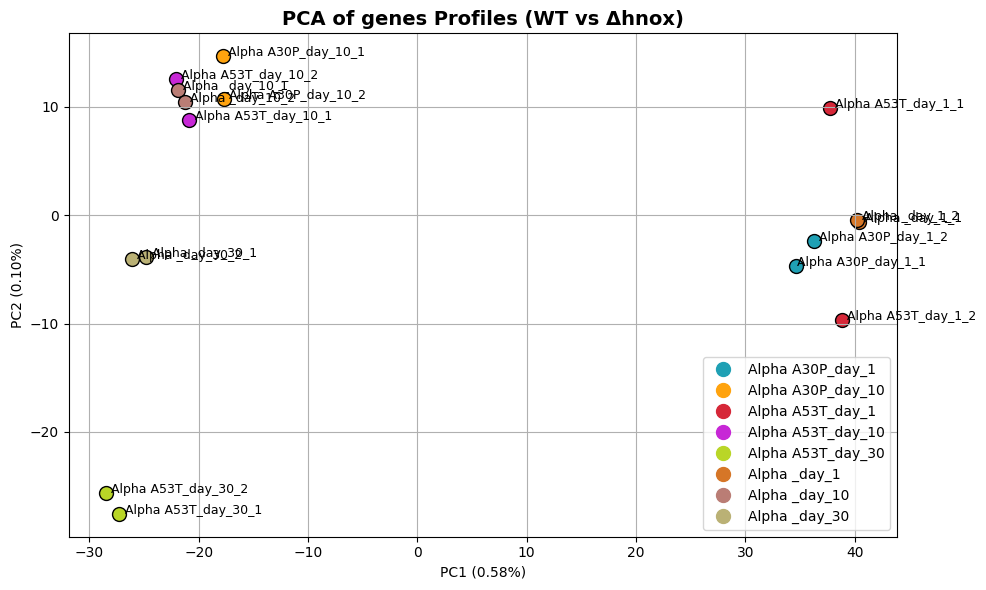

In [51]:
# Plot PCA
plt.figure(figsize=(10, 6))
for i, label in enumerate(labels):
    plt.scatter(
        pca_result[i, 0],
        pca_result[i, 1],
        color=color_map[label],
        s=100,
        edgecolor='black'
    )
    # Add text label
    plt.text(
        pca_result[i, 0] + 0.1,  # slight x offset
        pca_result[i, 1],
        sample_names[i],
        fontsize=9
    )

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create custom legend handles
legend_handles = [mlines.Line2D([], [], color=color_map[label], marker='o', linestyle='None', markersize=10, label=label) for label in color_map]

plt.xlabel(f'PC1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2f}%)')
plt.title('PCA of genes Profiles (WT vs Δhnox)', fontsize=14, weight='bold')
plt.legend(handles=legend_handles)
plt.grid(True)
plt.tight_layout()
png_path = 'PCA_Metabolites_p den_od_all.png'
pdf_path = 'PCA_Metabolites_p den_od_all.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)

plt.show()